## Constants

In [4]:
TRAIN_VALID = '../data/raw/TrainAndValid.csv'

## Import tools

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv(TRAIN_VALID, low_memory=False)
df.head()

F:\PROGRAMS\Programming\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (13,39,40,41) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Get overview on the data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

### Start looking for nulls 

<AxesSubplot:>

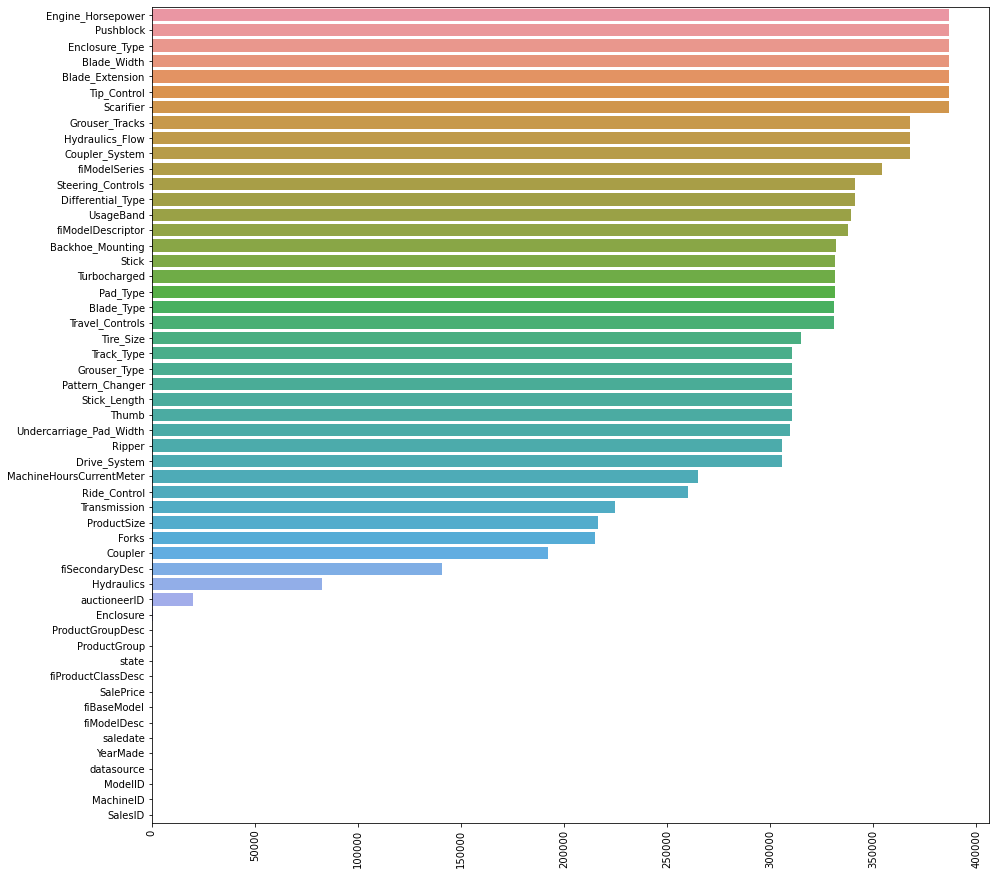

In [33]:
nulls = df.isnull().sum().sort_values(ascending=False)
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.barplot(y=nulls.index, x=nulls.values)


<Figure size 720x720 with 0 Axes>

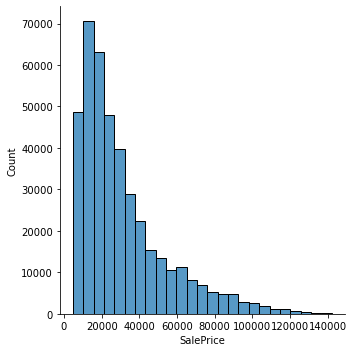

In [50]:
plt.figure(figsize=(10,10))
sns.displot(df.SalePrice, bins=25)

### Parsing the date

In [52]:
df = pd.read_csv(TRAIN_VALID, low_memory=False, parse_dates=['saledate'])
df.saledate.head()

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
Name: saledate, dtype: datetime64[ns]

<AxesSubplot:xlabel='saledate', ylabel='SalePrice'>

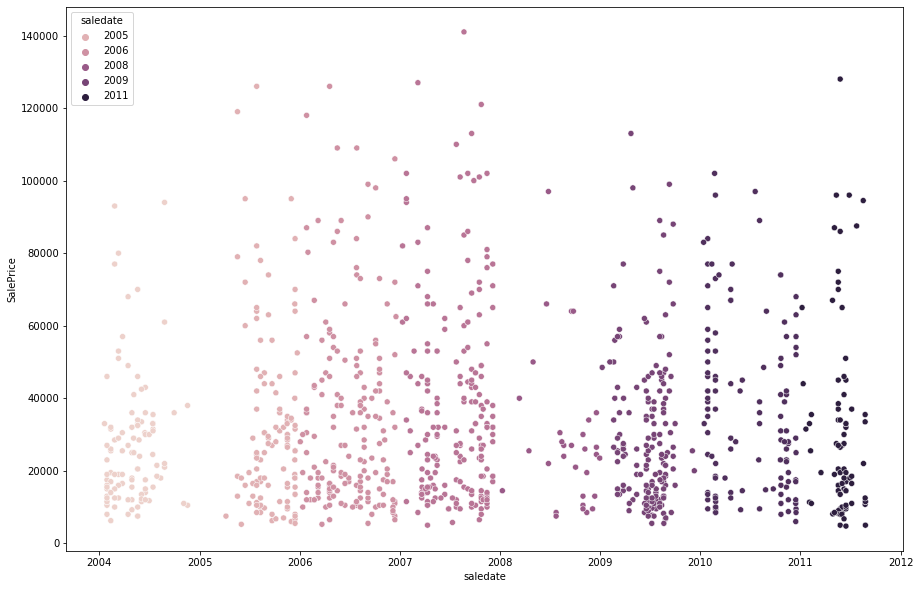

In [61]:
plt.figure(figsize=(15,10))
sns.scatterplot(df.saledate[:1000], df.SalePrice[:1000], hue= pd.DatetimeIndex(df.saledate[:1000]).year)

## Make a copy of original dataframe

In [71]:
df.sort_values(by='saledate', ascending=True, inplace=True)
df_tmp = df.copy()
df_tmp.head(10)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
233186,1728883,30000.0,1523610,9105,132,99.0,1986,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
142491,1508502,21000.0,1153157,4138,132,99.0,1972,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Angle,None or Unspecified,NaN,NaN
115536,1452578,33000.0,1544443,3854,132,99.0,1974,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
92301,1403418,24000.0,1390168,7110,132,99.0,1986,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115892,1453054,36000.0,1117184,3854,132,99.0,1977,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
134080,1491298,46000.0,1322436,4107,132,99.0,1987,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN
92294,1403411,23000.0,1184544,7110,132,99.0,1986,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31494,1263797,17000.0,1526902,6953,132,99.0,1983,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
140922,1504404,26000.0,1310407,4139,132,99.0,1975,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Angle,None or Unspecified,NaN,NaN


### Re-analysis the date

In [64]:
df_tmp['year'] = pd.DatetimeIndex(df_tmp.saledate).year
df_tmp[['saledate', 'year']].head()

,saledate,year
205615,1989-01-17,1989
274835,1989-01-31,1989
141296,1989-01-31,1989
212552,1989-01-31,1989
62755,1989-01-31,1989


<AxesSubplot:xlabel='year'>

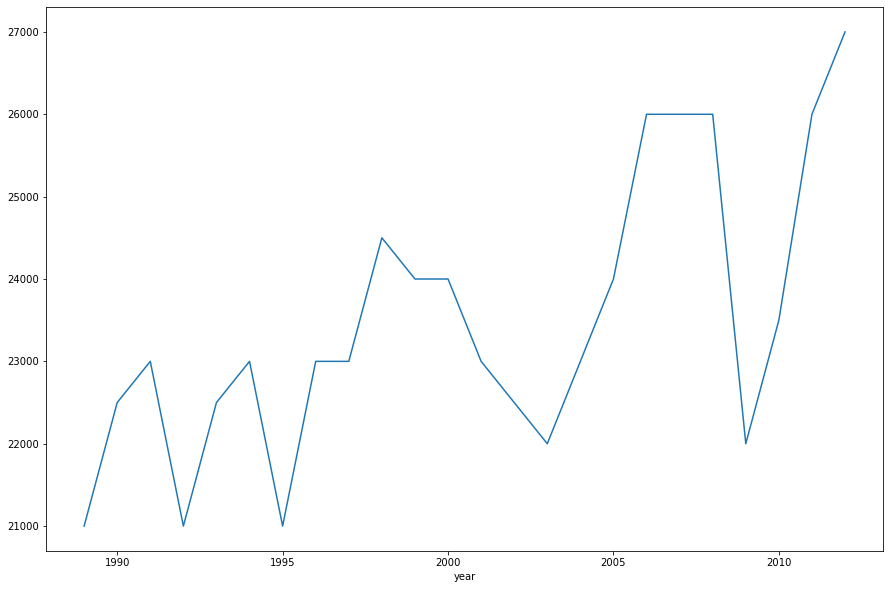

In [70]:
mean_sales_year = df_tmp.groupby('year')['SalePrice'].median()
plt.figure(figsize=(15,10))
sns.lineplot(x=mean_sales_year.index, y=mean_sales_year.values)

### Analysis based on month

In [72]:
df_tmp['month'] = pd.DatetimeIndex(df_tmp.saledate).month
df_tmp[['saledate', 'month']].head()

,saledate,month
205615,1989-01-17,1
233186,1989-01-31,1
142491,1989-01-31,1
115536,1989-01-31,1
92301,1989-01-31,1


<AxesSubplot:xlabel='month'>

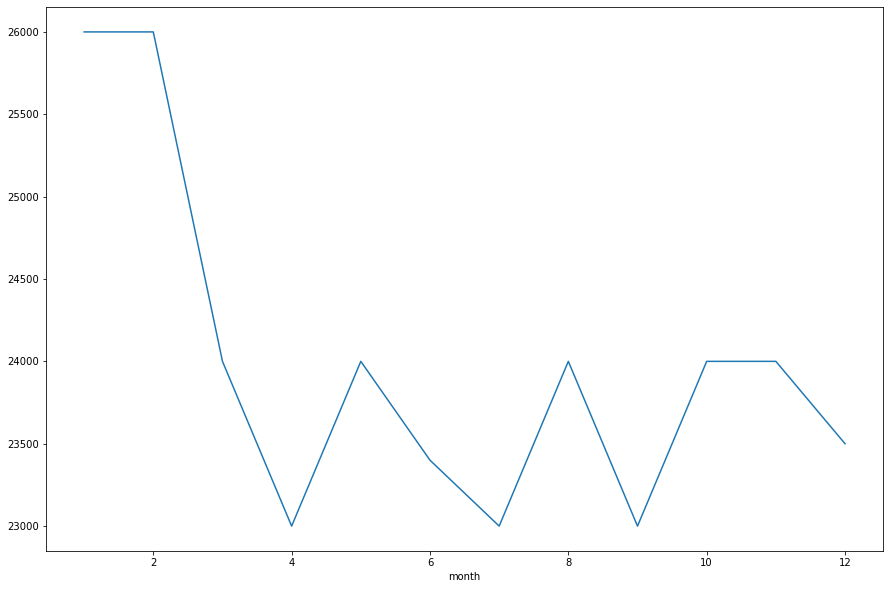

In [75]:
mean_sales_month = df_tmp.groupby('month')['SalePrice'].median()
plt.figure(figsize=(15,10))
sns.lineplot(x=mean_sales_month.index, y=mean_sales_month.values)

### Analysis based on days

In [79]:
df_tmp['day'] = pd.DatetimeIndex(df_tmp.saledate).day_name()
df_tmp[['saledate', 'day']].head()

,saledate,day
205615,1989-01-17,Tuesday
233186,1989-01-31,Tuesday
142491,1989-01-31,Tuesday
115536,1989-01-31,Tuesday
92301,1989-01-31,Tuesday


<AxesSubplot:xlabel='day'>

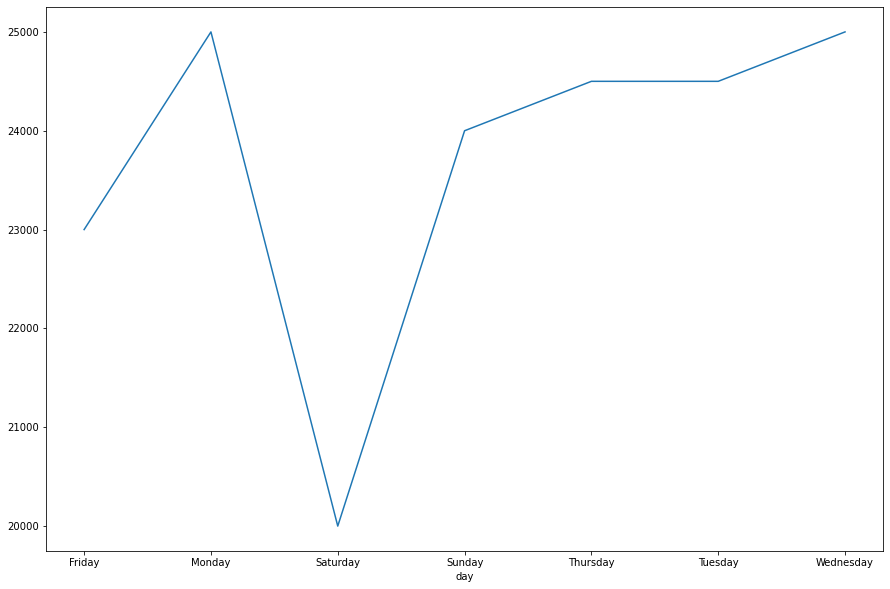

In [80]:
mean_sales_day = df_tmp.groupby('day')['SalePrice'].median()
plt.figure(figsize=(15,10))
sns.lineplot(x=mean_sales_day.index, y=mean_sales_day.values)